In [4]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print (y_train.shape)
print (y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255


In [7]:
print(x_test.shape)

(10000, 28, 28)


In [8]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [9]:
from tensorflow.keras import models,layers
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")

])








/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [11]:
history=model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.6705 - loss: 0.8939 - val_accuracy: 0.8379 - val_loss: 0.4312
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 36ms/step - accuracy: 0.8494 - loss: 0.4318 - val_accuracy: 0.8738 - val_loss: 0.3452
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 31ms/step - accuracy: 0.8715 - loss: 0.3595 - val_accuracy: 0.8865 - val_loss: 0.3111
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8907 - loss: 0.3109 - val_accuracy: 0.8963 - val_loss: 0.2903
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8966 - loss: 0.2917 - val_accuracy: 0.8991 - val_loss: 0.2906
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 33ms/step - accuracy: 0.9065 - loss: 0.2608 - val_accuracy: 0.9040 - val_loss: 0.2709
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - accuracy: 0.9142 - loss: 0.2408 - val_accuracy: 0.9053 - val_loss: 0.2675
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9175 -

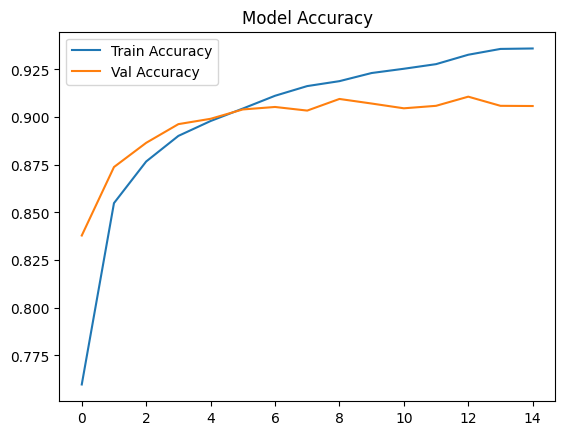

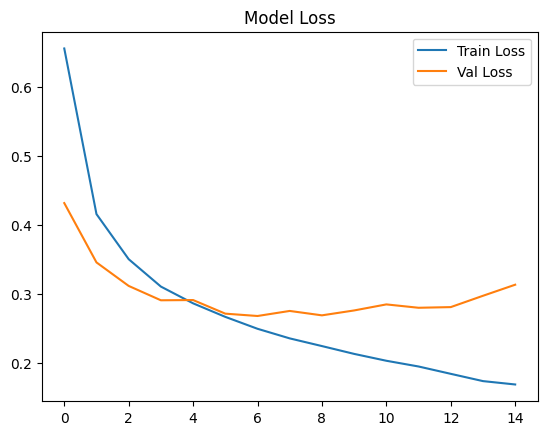

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


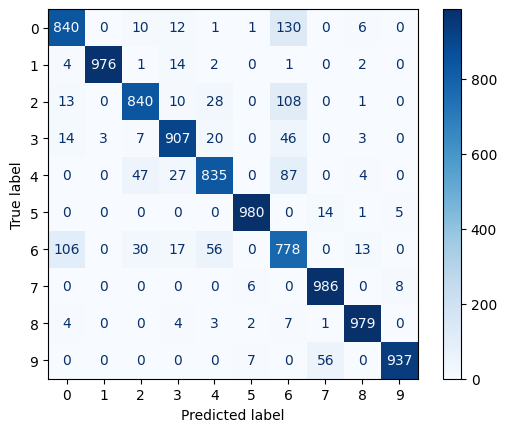

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


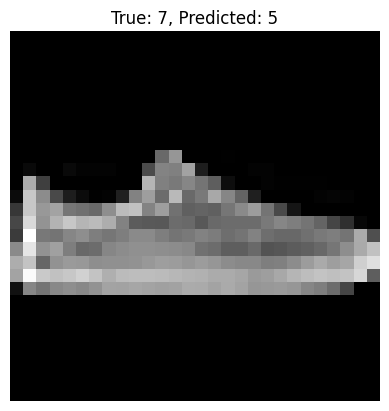

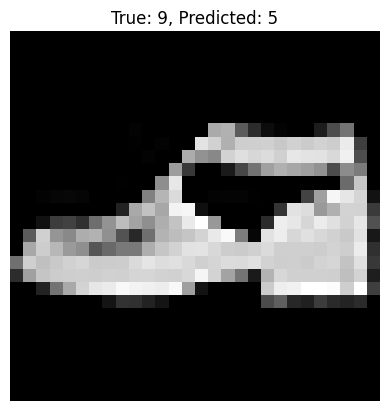

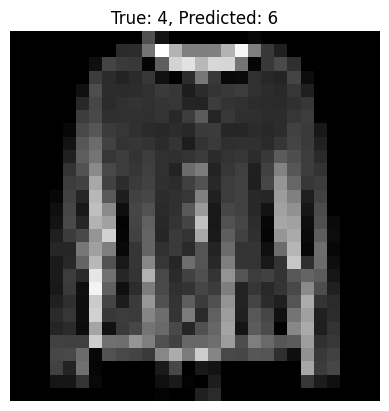

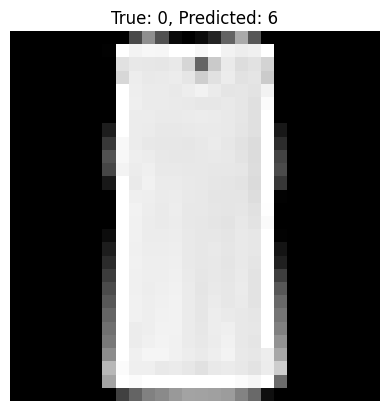

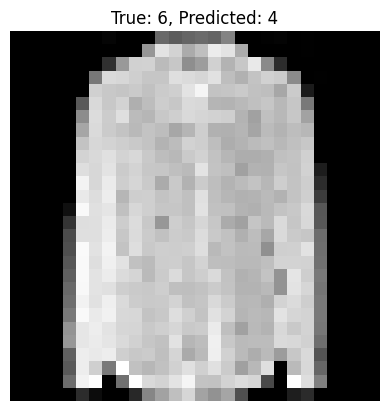

In [17]:
wrong_indices = np.where(y_pred_classes != y_test)[0]

for i in range(5):
    idx = wrong_indices[i]
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.axis('off')
    plt.show()


In [18]:
model.save("fashion_cnn_model.h5")
